# Delphi Football Analytics

### Q
* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
* The team's win percentage on days where it was raining during games in the 2011 season. 

1. Import sql and get data from database .
2. import pandas covert database to (pandas dataframe).
3. import matplotlip and visualise data as pyplot (plt)
4. Request to get API .(URL) to get data 
5. Create Classes (name)
6. save no nosql database 

In [85]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline
import numpy as np 
import requests



In [33]:
# Creating a variable to access data 
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()

[(1, 'D2', 2009, '2010-04-04', 'Oberhausen', 'Kaiserslautern', 2, 1, 'H'),
 (2, 'D2', 2009, '2009-11-01', 'Munich 1860', 'Kaiserslautern', 0, 1, 'A'),
 (3, 'D2', 2009, '2009-10-04', 'Frankfurt FSV', 'Kaiserslautern', 1, 1, 'D'),
 (4, 'D2', 2009, '2010-02-21', 'Frankfurt FSV', 'Karlsruhe', 2, 1, 'H'),
 (5, 'D2', 2009, '2009-12-06', 'Ahlen', 'Karlsruhe', 1, 3, 'A'),
 (6, 'D2', 2009, '2010-04-03', 'Union Berlin', 'Karlsruhe', 1, 1, 'D'),
 (7, 'D2', 2009, '2009-08-14', 'Paderborn', 'Karlsruhe', 2, 0, 'H'),
 (8, 'D2', 2009, '2010-03-08', 'Bielefeld', 'Karlsruhe', 0, 1, 'A'),
 (9, 'D2', 2009, '2009-09-26', 'Kaiserslautern', 'Karlsruhe', 2, 0, 'H'),
 (10, 'D2', 2009, '2009-11-21', 'Hansa Rostock', 'Karlsruhe', 2, 1, 'H'),
 (11, 'D2', 2009, '2009-12-19', 'Greuther Furth', 'Karlsruhe', 1, 4, 'A'),
 (12, 'D2', 2009, '2010-04-16', 'Koblenz', 'Karlsruhe', 2, 2, 'D'),
 (13, 'D2', 2009, '2010-03-21', 'Oberhausen', 'Karlsruhe', 1, 0, 'H'),
 (14, 'D2', 2009, '2009-09-14', 'Cottbus', 'Karlsruhe', 2, 4,

In [132]:
#c is the variable equals to cursor.execute
c = cursor.execute("""
            SELECT * FROM matches
            WHERE Season == 2011
            AND Div != 'E0'
            """)

df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [133]:
df.columns

Index(['Match_ID', 'Div', 'Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR'],
      dtype='object')

In [134]:
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [135]:
c = cursor.execute("""
            SELECT * FROM Matches
            LIMIT 4; """)
Teams_in_Matches_df = pd.DataFrame(c.fetchall())
Teams_in_Matches_df.columns = [x[0]for x in c.description]
Teams_in_Matches_df
               

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H


In [136]:
#create a dummy variable (dummy)
dummy = pd.get_dummies(df['FTR'])
dummy.columns = ['Loss','Draw','Win']
dummy.head()

,Loss,Draw,Win
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0


In [137]:
#concatenate the data with pd concat method  
df_homes = pd.concat([df,dummy], axis=1,join='inner')
df_homes.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Loss,Draw,Win
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1,0,0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1,0,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1,0,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,0,0,1
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,0,1,0


In [138]:
dfh = df_homes.groupby('HomeTeam').sum()

In [139]:
dfa = df_homes.groupby('AwayTeam').sum()

In [140]:
dfnew = dfa
dfnew['Total_Goals'] =  dfh['FTHG'] + dfa['FTAG']
dfnew.head()

,Match_ID,Season,FTHG,FTAG,Loss,Draw,Win,Total_Goals
AwayTeam,,,,,,,,
Aachen,26214,34187,23,15,2,7,8,30
Augsburg,27659,34187,30,16,2,7,8,36
Bayern Munich,18700,34187,16,28,9,3,5,77
Bochum,23035,34187,32,18,3,4,10,41
Braunschweig,26792,34187,20,16,4,7,6,37


In [141]:
dfnew['Total_Goals'] = dfa['FTAG'] + dfh['FTHG']
dfnew.head()

,Match_ID,Season,FTHG,FTAG,Loss,Draw,Win,Total_Goals
AwayTeam,,,,,,,,
Aachen,26214,34187,23,15,2,7,8,30
Augsburg,27659,34187,30,16,2,7,8,36
Bayern Munich,18700,34187,16,28,9,3,5,77
Bochum,23035,34187,32,18,3,4,10,41
Braunschweig,26792,34187,20,16,4,7,6,37


In [142]:
df_loss = 

SyntaxError: invalid syntax (<ipython-input-142-b2b5089d695d>, line 1)

In [143]:
key = '90e2937454f78fc8a3aa3f6f0bcad17d'
latitude = '52.520008'
longitude = '13.404954'
timestamp = '255589200'

In [144]:
r = requests.get(f'https://api.darksky.net/forecast/{key}/{latitude},{longitude},{timestamp}')

In [145]:
r.json()
                
    
                    
                

{'latitude': 52.520008,
 'longitude': 13.404954,
 'timezone': 'Europe/Berlin',
 'currently': {'time': 255589200,
  'temperature': 26.28,
  'apparentTemperature': 17.85,
  'dewPoint': 22.83,
  'humidity': 0.87,
  'pressure': 1017.3,
  'windSpeed': 8.05,
  'windBearing': 90,
  'cloudCover': 0.63,
  'uvIndex': 0},
 'hourly': {'data': [{'time': 255567600,
    'temperature': 26.73,
    'apparentTemperature': 19.36,
    'dewPoint': 23.02,
    'humidity': 0.86,
    'pressure': 1018.9,
    'windSpeed': 6.72,
    'windBearing': 104,
    'cloudCover': 0.72,
    'uvIndex': 0},
   {'time': 255571200,
    'temperature': 26.72,
    'apparentTemperature': 18.92,
    'dewPoint': 23.02,
    'humidity': 0.86,
    'pressure': 1018.3,
    'windSpeed': 7.28,
    'windBearing': 107,
    'cloudCover': 1,
    'uvIndex': 0},
   {'time': 255574800,
    'temperature': 26.28,
    'apparentTemperature': 18.82,
    'dewPoint': 22.6,
    'humidity': 0.86,
    'pressure': 1018.7,
    'windSpeed': 6.72,
    'windBeari

In [146]:
r.json()['hourly']['data'][0]["temperature"]

26.73

In [147]:
r.json()['currently']['icon']

KeyError: 'icon'

In [ ]:
import seaborn as sns
sns.set(style='whitegrid')  #'darkgrid'
sns.set_context('poster')

In [ ]:
plt.figure(figsize=(30,20))  # set size of table

ax = sns.barplot(data=df_homes, 
                x = 'Win',
                y = 'HomeTeam').set_title('Home Wins')

In [148]:
plt.figure(figsize=(30,20))  # set size of table

ax = sns.barplot(data = df_Awaylosses, 
                x = 'loss',
                y = 'AwayTeam').set_title('Away loss')

NameError: name 'df_Awaylosses' is not defined

<Figure size 2160x1440 with 0 Axes>

In [149]:
# find away losses
c.execute('''SELECT AwayTeam AS Team, COUNT(FTR) AS AwayLosses
               FROM Matches
               Where Season = 2011
               AND FTR = 'H'
               AND NOT Div ='E0'
               GROUP BY AwayTeam
               ;''')
AwayLosses_df = pd.DataFrame(c.fetchall())
AwayLosses_df.columns = [x[0] for x in c.description]
AwayLosses_df.head()

,Team,AwayLosses
0,Aachen,8
1,Augsburg,8
2,Bayern Munich,5
3,Bochum,10
4,Braunschweig,6


In [150]:
c.execute('''SELECT HomeTeam AS Team, COUNT(FTR) AS HomeLosses
               FROM Matches
               Where Season = 2011
               AND FTR = 'H'
               AND NOT Div ='E0'
               GROUP BY HomeTeam
               ;''')
HomeLosses_df = pd.DataFrame(c.fetchall())
HomeLosses_df.columns = [x[0] for x in c.description]
HomeLosses_df.head()

,Team,HomeLosses
0,Aachen,4
1,Augsburg,6
2,Bayern Munich,14
3,Bochum,7
4,Braunschweig,6


In [151]:
dfTotal_loss['TotalLoss'] = HomeLosses_df.HomeLosses + AwayLosses_df.AwayLosses

In [152]:
dfTotal_loss.head()

,AwayLosses,HomeLosses,Team,TotalLoss
0,NaN,NaN,AachenAachen,12
1,NaN,NaN,AugsburgAugsburg,14
2,NaN,NaN,Bayern MunichBayern Munich,19
3,NaN,NaN,BochumBochum,17
4,NaN,NaN,BraunschweigBraunschweig,12


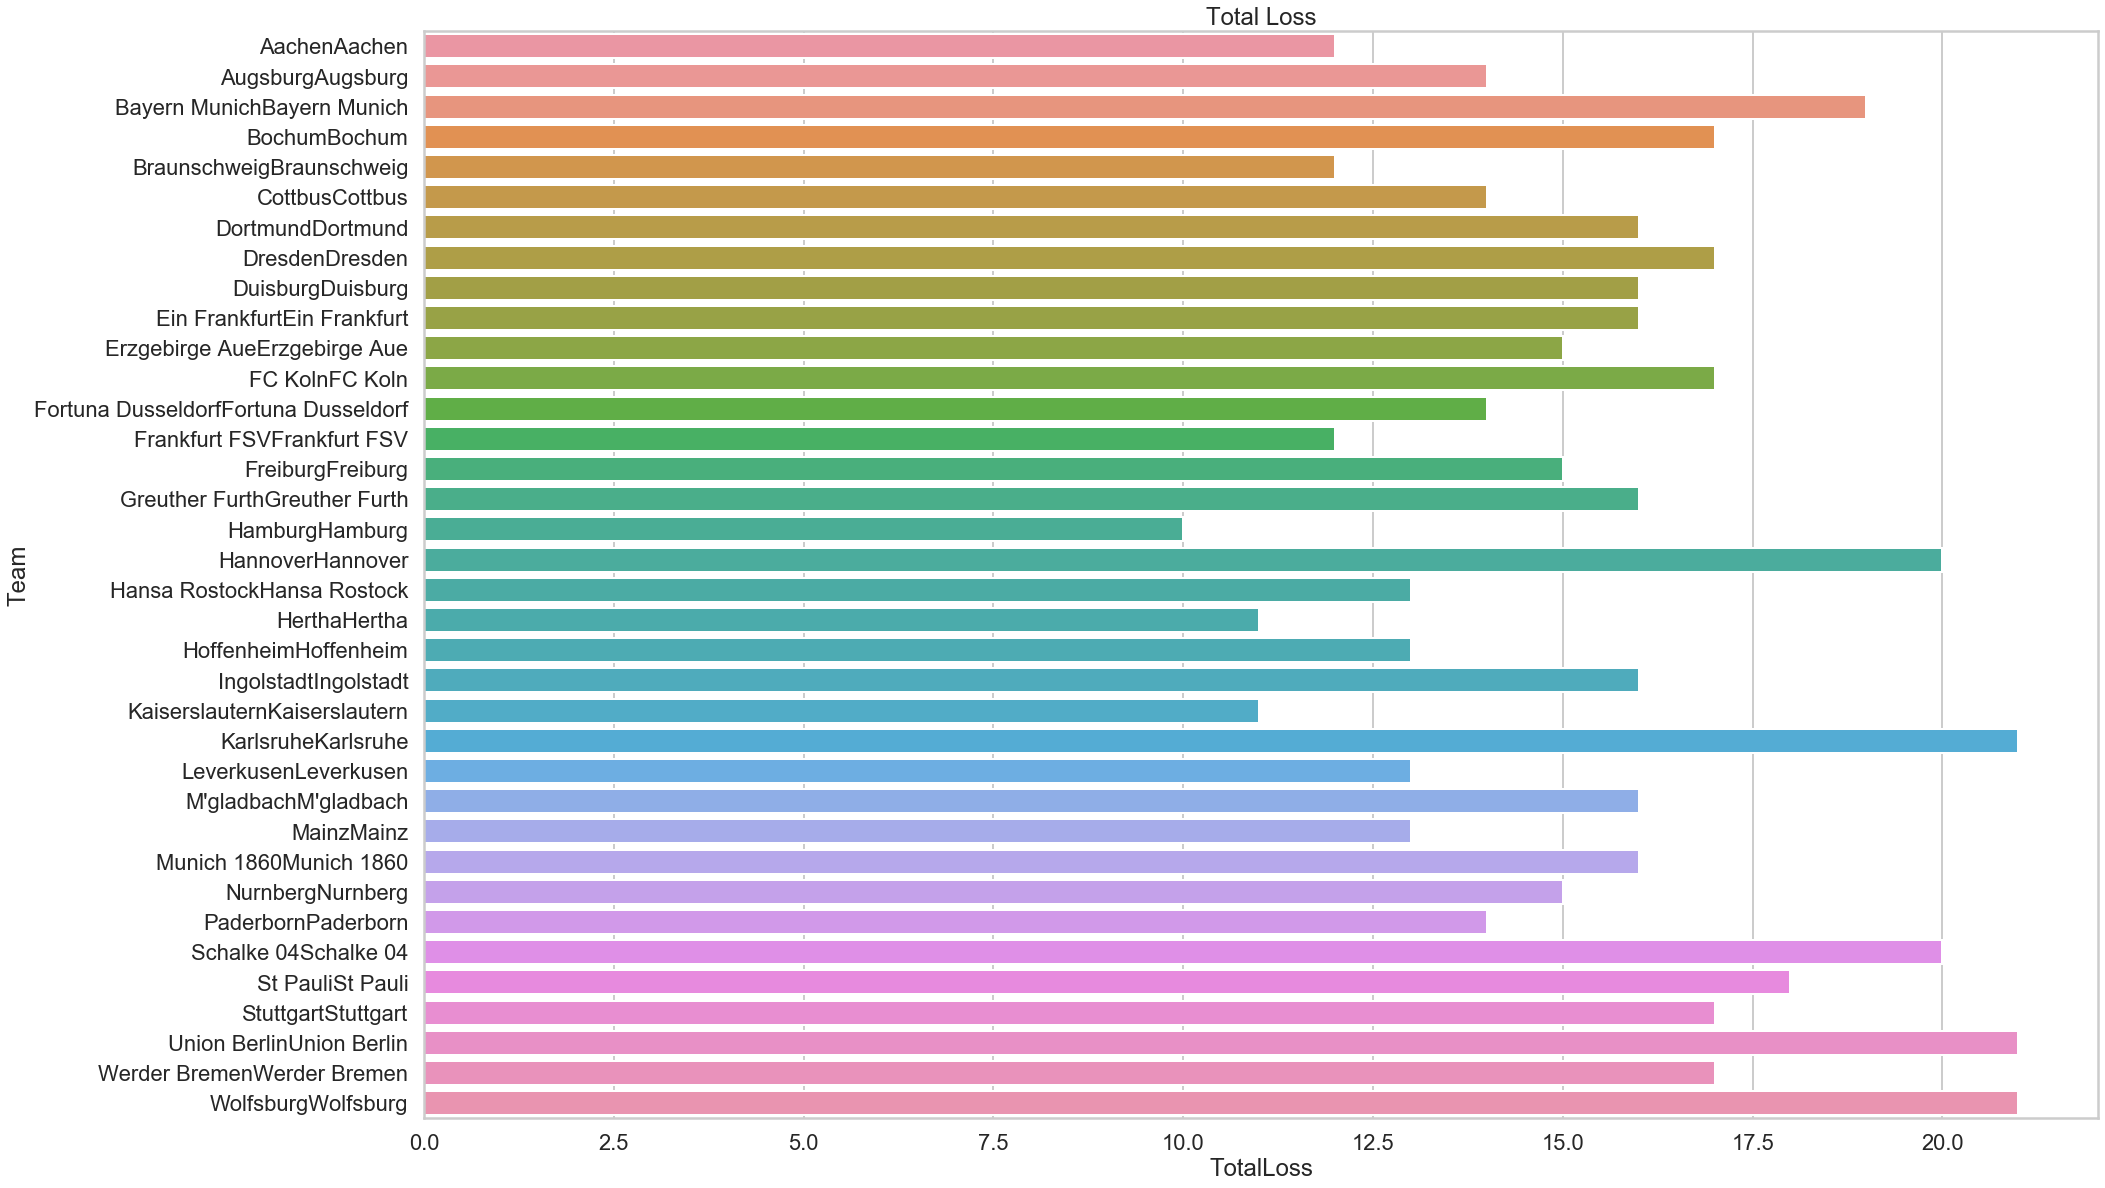

In [153]:
plt.figure(figsize=(30,20))  # set size of table

ax = sns.barplot(data=dfTotal_loss, 
                x = 'TotalLoss',
                y = 'Team').set_title('Total Loss')

In [154]:
#df['Date'] = pd.to_datetime(df['Date'])

In [155]:
dt.Date

NameError: name 'dt' is not defined

In [162]:
df.Date.head()

0    2012-03-31
1    2011-12-11
2    2011-08-13
3    2011-11-27
4    2012-02-18
Name: Date, dtype: object

In [171]:
dfnew = df
dfnew['Date'] = pd.to_datetime(df['Date'])

In [177]:
from datetime import datetime

In [178]:
def get_seconds(date):
        dapi = datetime(1970, 1, 1, 18, 00)
        d = int((date - dapi).total_seconds())
        return d

In [188]:
for date in df.loc['Date']:
    seconds = get_seconds(date)
    r = requests.get(f'https://api.darksky.net/forecast/{key}/{latitude},{longitude},{seconds}')
    if 'icon' in r.json()['currently'].keys():
        dfnew['weather'] = r.json()['currently']['icon']
    else:
        dfnew['weather'] = 'sunny'

{'latitude': 52.520008, 'longitude': 13.404954, 'timezone': 'Europe/Berlin', 'currently': {'time': 1333087200, 'summary': 'Mostly Cloudy', 'icon': 'partly-cloudy-day', 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 45.02, 'apparentTemperature': 39.73, 'dewPoint': 37.4, 'humidity': 0.74, 'windSpeed': 10.35, 'windGust': 10.35, 'windBearing': 299, 'cloudCover': 0.75, 'uvIndex': 0, 'visibility': 6.216}, 'hourly': {'summary': 'Mostly cloudy throughout the day.', 'icon': 'partly-cloudy-day', 'data': [{'time': 1333058400, 'summary': 'Mostly Cloudy', 'icon': 'partly-cloudy-night', 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 44.57, 'apparentTemperature': 38.72, 'dewPoint': 36.25, 'humidity': 0.72, 'windSpeed': 11.6, 'windBearing': 297, 'cloudCover': 0.75, 'uvIndex': 0, 'visibility': 6.216}, {'time': 1333062000, 'summary': 'Mostly Cloudy', 'icon': 'partly-cloudy-night', 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 44.57, 'apparentTemperature': 37.67

{'latitude': 52.520008, 'longitude': 13.404954, 'timezone': 'Europe/Berlin', 'currently': {'time': 1323496800, 'summary': 'Mostly Cloudy', 'icon': 'partly-cloudy-night', 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 36.7, 'apparentTemperature': 28.01, 'dewPoint': 33.4, 'humidity': 0.88, 'windSpeed': 13.82, 'windGust': 16, 'windBearing': 240, 'cloudCover': 0.68, 'uvIndex': 0, 'visibility': 6.216}, 'hourly': {'summary': 'Mostly cloudy throughout the day.', 'icon': 'partly-cloudy-day', 'data': [{'time': 1323471600, 'summary': 'Mostly Cloudy', 'icon': 'partly-cloudy-night', 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 39.14, 'apparentTemperature': 30.4, 'dewPoint': 28.79, 'humidity': 0.66, 'windSpeed': 16.1, 'windGust': 16.1, 'windBearing': 240, 'cloudCover': 0.75, 'uvIndex': 0, 'visibility': 6.216}, {'time': 1323475200, 'summary': 'Mostly Cloudy', 'icon': 'partly-cloudy-night', 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 39.14, 'apparentTemp

In [189]:
dfnew.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,partly-cloudy-night
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-night
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-night
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-night
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-night
